In [23]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from hiive.mdptoolbox import example, mdp

# Create helper functions

In [107]:
def visualize_env(env, name, title=None):
    shape = env.desc.shape
    M = shape[0]
    N = shape[1]
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)

    for i in range(M):
        for j in range(N):
            if (i, j) == (0, 0):
                ax.text(j, i, 'S', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, 'F', ha='center', va='center', color='k', size=18)
    fig.tight_layout()
    if title:
        ax.set_title(title)
    plt.show()

In [128]:
def visualize_value(V, shape, name, title=None):
    V = np.asarray(V)
    M = shape[0]
    N = shape[1]
    fig, ax = plt.subplots(figsize=(12,12))
    arr = V.reshape(shape)
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', fontsize=16)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', fontsize=16)
            else:
                ax.text(j, i, '%.2f' % (arr[i, j]), ha='center', va='center', color='k', fontsize=16)
    # fig.tight_layout()
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('State-value estimate', rotation=-90, va="bottom")
    if title:
        ax.set_title(title)
    plt.show()

In [129]:
def visualize_policy(policy, shape, name, title=None):
    M = shape[0]
    N = shape[1]
    actions = np.asarray(policy).reshape(shape)
    mapping = {
        0: '←',
        1: '↓',
        2: '→',
        3: '↑'
    }
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)

    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, mapping[actions[i, j]], ha='center', va='center', color='k', size=18)
    # fig.tight_layout()
    if title:
        ax.set_title(title)
    plt.show()

In [27]:
def getRewardProb(env, sz):
    sz = int(sz**2)
    r = np.zeros((4,sz,sz))
    p = np.zeros((4,sz,sz))
    envP = env.unwrapped.P
    for state in envP:
        for action in envP[state]:
            transitions = envP[state][action]
            for t_idx in range((len(transitions))):
                new_state = transitions[t_idx][1]
                trans_prob = transitions[t_idx][0]
                reward = transitions[t_idx][2]
                p[action][state][new_state] += trans_prob
                r[action][state][new_state] += reward
            p[action,state,:] /= np.sum(p[action,state,:])
    return r, p

# Frozen Lake

In [125]:
desc=["SFFFFFFHHHFFFFFFFFFF","FFFFFFFFFFFFFFFFHHFF","FFFHFFFFFFFHHFFFFFFF","FFFFFHFFFFFFFFFFHHFF"
      ,"FFFFFHFFFFFFFFFFHHFF"
      ,"FFFFFHFFFFFFFFFFHHFF"
      ,"FFFFFFFFHFFFFFFFHHFF"
      ,"FFFFFHFFFFHHFFFFHHFF"
      ,"FFFFFHFFFFFFFFFFHHFF"
      ,"FFFFFHFFFFFFFFFFHHFF"
      ,"FFFFFFFFFFFHHHHHHHFF"
      ,"HHHHFHFFFFFFFFFFHHFF"
      ,"FFFFFHFFFFHHHFFFHHFF"
      ,"FFFFFFFFFFFFFFFFHHFF"
      ,"FFFFFHFFFFFFHFFFHHFF"
      ,"FFFFFHFFFFFFFFFFHHFF"
      ,"FFFFFFFFFFFHFFFFFFFF"
      ,"FHHFFFHFFFFHFFFFFHFF"
      ,"FHHFHFHFFFFFFFFFFFFF"
      ,"FFFHFFFFFHFFFFHHFHFG"]

In [119]:
desc='SFFFFFFHHHFFFFFFFFFFFFFFFFFFFFFFFFFFHHFFFFFHFFFFFFFHHFFFFFFFFFFFFHFFFFFFFFFFHHFFFFFFFHFFFFFFFFFFHHFFFFFFFHFFFFFFFFFFHHFFFFFFFFFFHFFFFFFFHHFFFFFFFHFFFFHHFFFFHHFFFFFFFHFFFFFFFFFFHHFFFFFFFHFFFFFFFFFFHHFFFFFFFFFFFFFHHHHHHHFFHHHHFHFFFFFFFFFFHHFFFFFFFHFFFFHHHFFFHHFFFFFFFFFFFFFFFFFFHHFFFFFFFHFFFFFFHFFFHHFFFFFFFHFFFFFFFFFFHHFFFFFFFFFFFFFHFFFFFFFFFHHFFFHFFFFHFFFFFHFFFHHFHFHFFFFFFFFFFFFFFFFHFFFFFHFFFFHHFHFG'

In [122]:
arr = []
for i in range(400):
    if desc[i]=='H':
        arr.append(i)
arr

[7,
 8,
 9,
 36,
 37,
 43,
 51,
 52,
 65,
 76,
 77,
 85,
 96,
 97,
 105,
 116,
 117,
 128,
 136,
 137,
 145,
 150,
 151,
 156,
 157,
 165,
 176,
 177,
 185,
 196,
 197,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 220,
 221,
 222,
 223,
 225,
 236,
 237,
 245,
 250,
 251,
 252,
 256,
 257,
 276,
 277,
 285,
 292,
 296,
 297,
 305,
 316,
 317,
 331,
 341,
 342,
 346,
 351,
 357,
 361,
 362,
 364,
 366,
 383,
 389,
 394,
 395,
 397]

In [123]:
# TERM_STATE_MAP = {"4x4": [5, 7, 11, 12],"8x8": [19, 29, 35, 41, 42, 46, 49, 52, 54, 59]
#                   , "20x20":[]}
# GOAL_STATE_MAP = {"4x4": [15], "8x8": [63], "20x20":[399]}
TERM_STATE_MAP = {"4x4": [5, 7, 11, 12], "8x8": [19, 29, 35, 41, 42, 46, 49, 52, 54, 59], "20x20":arr}
GOAL_STATE_MAP = {"4x4": [15], "8x8": [63], "20x20":[399]}

In [156]:
# value iteration
cmap = 'cool'
s = 20
opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", map_name=None, desc=desc)
env.reset()

(0, {'prob': 1})

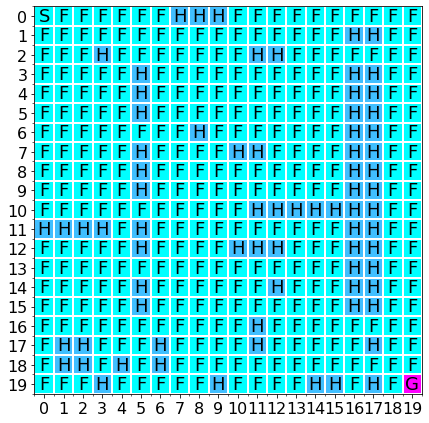

In [157]:
visualize_env(env, opt)

In [130]:
import matplotlib as mpl
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)

In [158]:
r, p = getRewardProb(env, s)

In [131]:
import time

In [159]:
t_arr=[]
for i in range(1, 100):
    t1 = time.time()
    vi = mdp.ValueIteration(p, r, 0.9, max_iter=i)
    vi.run()
    t_arr.append(time.time()-t1)

In [179]:
y1 = np.cumsum(np.abs(np.array(t_arr[1:])-np.array(t_arr[:-1])))

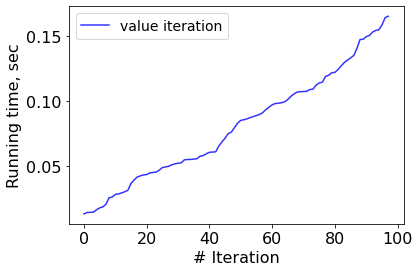

In [180]:
plt.plot(range(len(y1)), y1, color='blue', alpha=0.8, label='value iteration')
plt.xlabel('# Iteration')
plt.ylabel('Running time, sec')
plt.legend(fontsize=14)

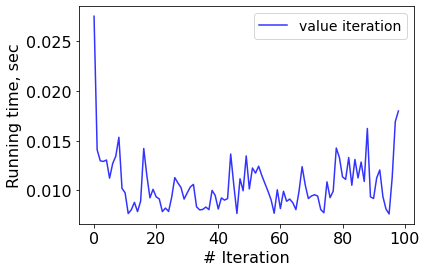

In [170]:
plt.plot(range(len(t_arr)), t_arr, color='blue', alpha=0.8, label='value iteration')
plt.xlabel('# Iteration')
plt.ylabel('Running time, sec')
plt.legend(fontsize=14)

In [142]:
t_arr_p=[]
for i in range(1, 100):
    t1 = time.time()
    vi = mdp.PolicyIteration(p, r, 0.9, max_iter=i)
    vi.run()
    t_arr_p.append(time.time()-t1)

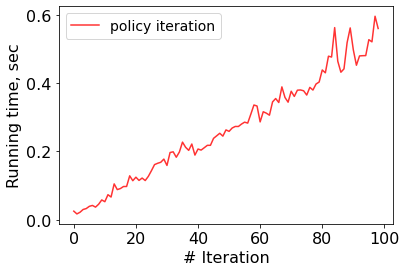

In [171]:
plt.plot(range(len(t_arr_p)), t_arr_p, label='policy iteration', alpha=0.8,color='red')
plt.xlabel('# Iteration')
plt.ylabel('Running time, sec')
plt.legend(fontsize=14)

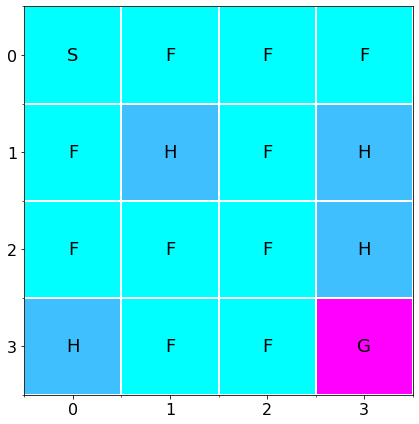

In [162]:
s = 4
opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", map_name=opt)
env.reset()
visualize_env(env, opt)

In [163]:
r_, p_ = getRewardProb(env, s)

In [164]:
t_arr_88=[]
for i in range(1, 100):
    t1 = time.time()
    vi = mdp.ValueIteration(p_, r_, 0.9, max_iter=i)
    vi.run()
    t_arr_88.append(time.time()-t1)

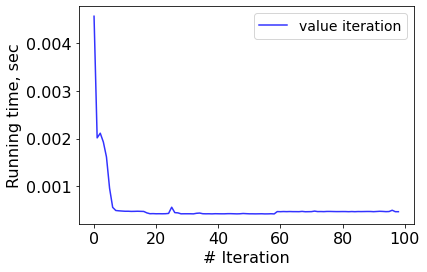

In [168]:
plt.plot(range(len(t_arr_88)), t_arr_88, color='blue', alpha=0.8, label='value iteration')
plt.xlabel('# Iteration')
plt.ylabel('Running time, sec')
plt.legend(fontsize=14)

In [166]:
t_arr_p_88=[]
for i in range(1, 100):
    t1 = time.time()
    vi = mdp.PolicyIteration(p, r, 0.9, max_iter=i)
    vi.run()
    t_arr_p_88.append(time.time()-t1)

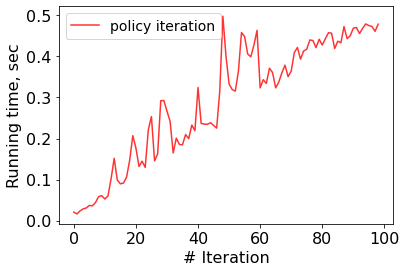

In [169]:
plt.plot(range(len(t_arr_p_88)), t_arr_p_88, label='policy iteration', alpha=0.8,color='red')
plt.xlabel('# Iteration')
plt.ylabel('Running time, sec')
plt.legend(fontsize=14)